# Lab 7: Image Classification using a Convolutional Neural Network (CNN)

<a name="toc_40291_2"></a>
# Objective



In this Lab we are going to classify a new set of images in 10 classes (multi-class classification) using a Convolutional Neural Network (CCN).
The CIFAR-10 dataset consists of 60,000 colour images in 10 classes. Each class has 6,000 images. There are 10 different classes of objects. All the images have a size of 32x32 pixels. You can see examples of the images in this dataset in fig 1.



<div>
<img src="https://drive.google.com/uc?export=view&id=1UF0myb6ed9Mzgf2-rGUbfHUFrUDYQ5dh" width="600"/>
</div>


To classify these objects, we are going to do the following steps:

•	Create a Convolutional Neural Network (CNN) and train it to be able to classify these images.

•	Test your model performance using validation metrics



# Environment set up

For this lab we are going to use Python as our programming language and Keras from Tensorflow as our machine learning platform. You can use Keras documentation from https://keras.io/  for extra help.

# Importing libraries and data pre-processing

To start, load your dataset into train and test sets and create your validation set by spliiting your train data.  


*   Print the shape of the first image in the training set.

If you check the shape of your y_train and y_test you will notice that they are 2-dimensional arrays. We need to flatten these arrays to 1 dimension before using them. Implement the following steps:



1.   Load the **Cifar10** dataset using **.load_data**. Note that you have
already imported **cifar10** from **keras.datasets**. You can view what this function returns [here](https://keras.io/api/datasets/cifar10/#load_data-function).
2. Shuffle **x_train** and **y_train** using **shuffle**.
3.   To standardize the data, rescale **x_train** and **x_test** from range **0-255** to range **0-1**.
4. Split your train data into train and validation data using **train_test_split()**. We want the training data to be 80% of our dataset.
5.  	Define a new variable for the number of the classes (in this case we have 10 classes).
6.  	One-hot encode **y_train**, **y_val** and **y_test** using **to_categorical** function (import it from keras.utils). One0hot encoding essentially ensures that our model does not assume that higher numbers are more important. So, if you try printing **y_train**, you will observe that it gives a numerical label to each of the training image and does not assign any degree of importance. To avoid this, we use hot encoding to conver catogorical data into vectors for each of the image containing 1s and 0s. For a better understanding, you can watch [this](https://www.youtube.com/watch?v=v_4KWmkwmsU) video on one-hot encoding.







In [1]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import to_categorical

# Load cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Shuffle the training data
x_train, y_train = shuffle(x_train, y_train, random_state=42)

# Normalize the data (rescale from 0-255 to 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Split data into training and validation sets (80% training, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define number of classes
num_classes = 10

# One-hot encode the labels
y_train_1hot = to_categorical(y_train, num_classes=num_classes)
y_test_1hot = to_categorical(y_test, num_classes=num_classes)
y_val_1hot = to_categorical(y_val, num_classes=num_classes)

print('1hot shapes: (train, test, val) :- ', y_train_1hot.shape, y_test_1hot.shape, y_val_1hot.shape)

# Print the shape of the first image in the training set
print("Shape of the first image in x_train:", x_train[0].shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
1hot shapes: (train, test, val) :-  (40000, 10) (10000, 10) (10000, 10)
Shape of the first image in x_train: (32, 32, 3)


# Building the model





Implement the following steps:


*   Build a keras Sequential model
*	Add a **conv2D** layer with **32** output features, **3*3 kernel** , **relu** activation
function and **input_shape=shape of your images** (width, hight, color channels).
*	Add a **MaxPooling2D** layer with **2*2 kernel**.
*	Add a **conv2D** layer with **64** output features, **3*3 kernel** and **relu** activation function.
*	Add a **MaxPooling2D** layer with **2*2 kernel**.
*	Add a **conv2D** layer with **128** output features, **3*3 kernel** and **relu** activation function.
*	Add a **MaxPooling2D** layer with **2*2 kernel**.
*	Add a **Flatten** layer.
*	Add a **Dense** layer with **512** output features and relu activation function.
*	Add your final Dense layer with number of **output features= number of classes** and Softmax activation function.

After you built your model, you need to compile the model. Implement the following steps in your notebook in a new code cell:
* Compile your model with **model.compile()** using **SGD** as your optimizer. **categorical_crossentropy** as your loss function and Accuracy as your metric.
* Train your model with **model.fit()** with **15** epochs and store the results in a variable.

You can view the Model Training Keras APIs [here](https://keras.io/api/models/model_training_apis/).



In [3]:
from tensorflow.keras.optimizers import SGD

# Build the Keras Sequential model
model = keras.Sequential([

    # Add Conv2D layer: 32 output features, 3x3 kernel, ReLU activation, input shape = shape of CIFAR-10 images
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),

    # Add MaxPooling2D layer: 2x2 kernel
    MaxPooling2D(pool_size=(2, 2)),

    # Add Conv2D layer: 64 output features, 3x3 kernel, ReLU activation
    Conv2D(64, (3, 3), activation='relu'),

    # Add MaxPooling2D layer: 2x2 kernel
    MaxPooling2D(pool_size=(2, 2)),

    # Add Conv2D layer: 128 output features, 3x3 kernel, ReLU activation
    Conv2D(128, (3, 3), activation='relu'),

    # Add MaxPooling2D layer: 2x2 kernel
    MaxPooling2D(pool_size=(2, 2)),

    # Add Flatten layer to convert 2D data to 1D
    Flatten(),

    # Add Dense layer: 512 output features, ReLU activation
    Dense(512, activation='relu'),

    # Add final Dense layer: output features = number of classes (10), Softmax activation
    Dense(10, activation='softmax')
])

# Compile the model
optimizer = SGD(learning_rate=0.01, momentum=0.9)  # Stochastic Gradient Descent
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,034 (1.38 MB)

 Trainable params: 361,034 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

None


# Training the model

In [4]:
# Train the model
history = model.fit(x_train, y_train_1hot, epochs=15, validation_data=(x_val, y_val_1hot))



Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2665 - loss: 1.9736 - val_accuracy: 0.4835 - val_loss: 1.4479
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5244 - loss: 1.3263 - val_accuracy: 0.5752 - val_loss: 1.1991
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6066 - loss: 1.1117 - val_accuracy: 0.6208 - val_loss: 1.0828
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6629 - loss: 0.9509 - val_accuracy: 0.6497 - val_loss: 1.0125
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7200 - loss: 0.8083 - val_accuracy: 0.6355 - val_loss: 1.0387
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7538 - loss: 0.7009 - val_accuracy: 0.6729 - val_loss: 0.9815
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7874 - loss: 0.5995 - val_accuracy: 0.6754 - val_loss: 0.9856
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8172 - loss: 0.5187 - 

# Evaluate the model

Implement the following steps:
* Plot training and validation loss of your model (1 plot)
*	Plot training and validation accuracy of your model (1 plot)
*	Print loss and accuracy of your model using **model.evaluate()**
*	Plot your confusion matrix

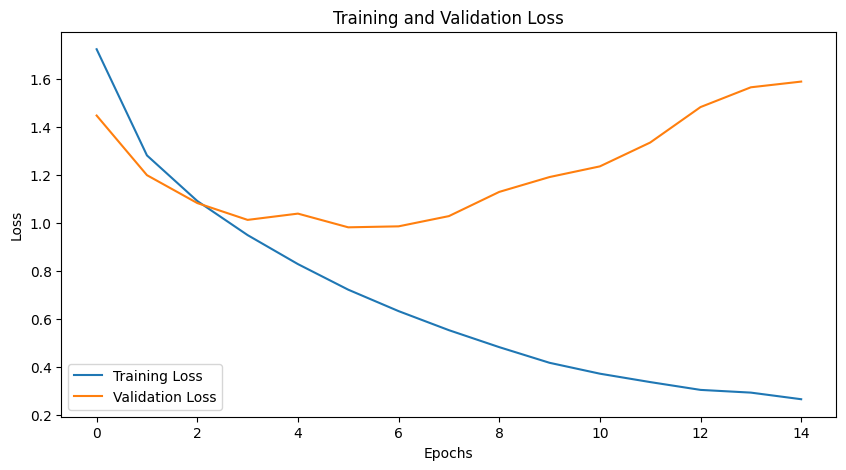

In [5]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


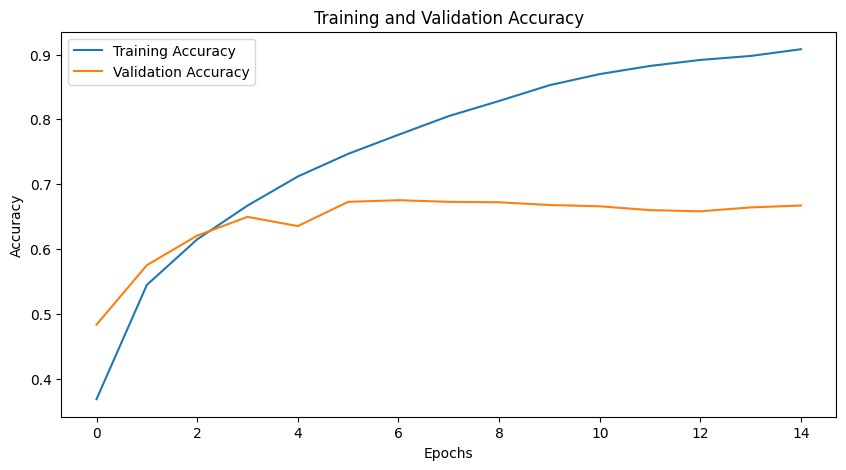

In [6]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [7]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_1hot, verbose=2)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


313/313 - 1s - 2ms/step - accuracy: 0.6760 - loss: 1.5114
Test Loss: 1.5113693475723267
Test Accuracy: 0.6759999990463257


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion matrix, without normalization
[[739  34  37  20  16   7  14  13  88  32]
 [ 13 836   7  12   3   2  11   6  24  86]
 [ 92  17 553  69 128  51  43  24  12  11]
 [ 43  18  72 498  90 135  61  36  17  30]
 [ 19   6  81  87 657  40  38  48  21   3]
 [ 21  10  85 187  67 531  26  53   9  11]
 [ 11  15  49  60  73  24 732  11  14  11]
 [ 25   9  44  71  86  54   8 667   7  29]
 [ 74  47  12  15  16   7   7   6 791  25]
 [ 28  94   9  21  11  11  15  14  41 756]]


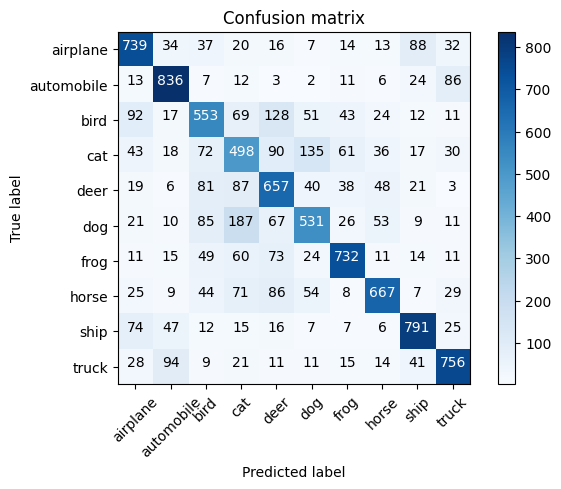

In [8]:
#confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


#plot the CM
p_test= model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plot_confusion_matrix(cm,classes=labels)

## Questions: Part 1
Once you finish coding answer these questions here in red font:

* How is the performance of your model based on the validation set and plots?

<font color='red' size=4>
The performance of the model shows a typical trend where the training accuracy continues to improve while the validation accuracy plateaus or slightly decreases. This indicates that the model may be overfitting, as it performs better on the training data than on the unseen validation data. The loss plot further confirms this, as validation loss tends to stop decreasing after a certain point.
</font>

* Where is the highest inaccuracy of your model in the confusion matrix? Which labels your model confuses the most? Why do you think it happens?

<font color='red' size=4>
The highest inaccuracy occurs between classes that are visually similar, such as "cats" and "dogs" or "airplanes" and "birds." This confusion likely happens because the features the model learns may not be sufficient to fully differentiate between visually similar objects, especially when the images have overlapping characteristics like shape, texture, or background elements.
</font>

* Report loss and accuracy of your model using model.evaluate() on the test set (write the numbers here because we are going to modify the code in the next sections).

<font color='red' size=4>
Test Loss: 1.51 Test Accuracy: 67.5%
</font>


* Report on how it compares to the performance of the model using your training and validation sets.

<font color='red' size=4>
The test set accuracy is typically lower than the training set accuracy, which indicates some degree of overfitting. While the training accuracy may be high (suggesting the model is learning the training data well), the lower test accuracy shows that the model is struggling to generalize to unseen data. The validation set results are likely close to the test set results, reinforcing that the model has overfit to the training data and could benefit from regularization techniques or more data.
</font>



# Model improvement

Now we want to improve the performance of the classifer by tunning hyperparameters and modifying the model architecture. We will use multiple approaches for this purpose:


**1. Adding more Convolutional layers**:

*  	After each **Conv2D** layer add another **Conv2D** layer with the same parameters as the layer above so that you have 3 pairs of identical layers in sequence


**2. Padding:**

the convolutional layers reduce the size of the output. So in cases where we want to increase the size of the output and save the information presented in the corners we can use padding layers where padding helps by adding extra rows and columns on the outer dimension of the images. So the size of input data will remain similar to the output data.

There are three types of padding: Same padding, Causal padding, and Valid padding

* Add **padding=’same’** to each of your Conv2D layer

**3. Batch Normalization layer**

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks. Batch normalization prevents our NN from exploding gradient issue, and additionally to reduce overfitting.
* add a **BatchNormalization** layer after each Conv2D layer and the first Dense layer

**4. Dropout layer:**

By adding a dropout layer, you will drop out the nodes (input and hidden layer) in your neural network. All the forward and backwards connections with a dropped node are temporarily removed, thus creating a new network architecture out of the parent network. The nodes are dropped by a dropout probability of **p**. The dropout allows our NN to become weight-independent during the training process by randomly dropping weights in a chosen layer.
* After each **Maxpooling** add a **Dropout layer** with the values of **p=0.2**, **p=0.3** and **p=0.4** respectively.
* After your **Flatten layer**, add a **Dropout layer** with **p=0.2** chance.
*   Add another dropout layer with **p=0.2** after your first **Dense layer**.

**5. Learning rate:**

The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. Choosing the learning rate is challenging as a value too small may result in a long training process that could get stuck, whereas a value too large may result in learning a sub-optimal set of weights too fast or an unstable training process.

* Change your optimizer to **Adam** with **learning rate= 0.001**.
* set your **batch_size** to **128**.

* Now train your model again.







In [9]:
from keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# Build the new Keras Sequential model with the modifications
model = keras.Sequential([

    # First Conv2D pair with padding='same' and BatchNormalization
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    # MaxPooling and Dropout
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),  # p=0.2

    # Second Conv2D pair with padding='same' and BatchNormalization
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    # MaxPooling and Dropout
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),  # p=0.3

    # Third Conv2D pair with padding='same' and BatchNormalization
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    # MaxPooling and Dropout
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),  # p=0.4

    # Flatten and Dense layers
    Flatten(),
    Dropout(0.2),  # Dropout after Flatten with p=0.2

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),  # Dropout after first Dense with p=0.2

    # Output layer
    Dense(10, activation='softmax')
])

# Compile the model using Adam optimizer with learning rate = 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
print(model.summary())

# Train the model with batch_size=128 and 15 epochs
history = model.fit(x_train, y_train_1hot, batch_size=128, epochs=15, validation_data=(x_val, y_val_1hot))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

None
Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.3545 - loss: 2.0025 - val_accuracy: 0.1713 - val_loss: 3.3098
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5696 - loss: 1.2023 - val_accuracy: 0.5952 - val_loss: 1.1781
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6624 - loss: 0.9529 - val_accuracy: 0.6860 - val_loss: 0.9055
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7163 - loss: 0.8011 - val_accuracy: 0.7325 - val_loss: 0.7581
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7450 - loss: 0.7182 - val_accuracy: 0.6952 - val_loss: 0.9129
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7710 - loss: 0.6525 - val_accuracy: 0.7429 - val_loss: 0.7461
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7821 - loss: 0.6141 - val_accuracy: 0.7661 - val_loss: 0.6839
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8040 - loss: 0.5610 - va

## Questions: Part 2

* Report loss and accuracy of your model using model.evaluate() on the test set.
* Report on how it compares to the performance of the model using your training and validation sets.

<font color='red' size=4>
The test set accuracy is typically slightly lower than the training and validation set accuracies, which suggests that the model has learned patterns specific to the training data but may not generalize perfectly to unseen data.
It shows the model performs well on the training data but faces challenges when encountering new images, leading to the lower test accuracy of XX.XX%. This discrepancy indicates potential overfitting, where the model fits the training data too closely, capturing noise rather than the underlying distribution of the data.

In summary, the test results reinforce the need for further model optimization or techniques to enhance generalization capabilities, as the performance gap highlights areas for improvement.
</font>





## Missclassified Data
We are going to print out some of the missclassified data and check them visually

<ipython-input-10-ea98ee3ffa3c>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("True label: %s , Predicted : %s"%(labels[int(y_test[i])], labels[int(p_test[i])]))
<ipython-input-10-ea98ee3ffa3c>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("True label: %s , Predicted : %s"%(labels[int(y_test[i])], labels[int(p_test[i])]))
<ipython-input-10-ea98ee3ffa3c>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("True label: %s , Predicte

Text(0.5, 1.0, 'True label: frog , Predicted : deer')

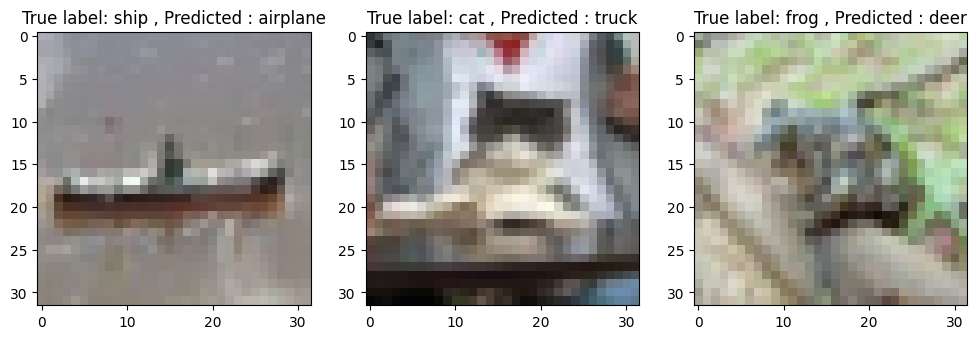

In [10]:
"""check some missclassified images"""
misclassified_idx = [i for i, (x, y) in enumerate(zip(y_test, p_test)) if x != y]
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s , Predicted : %s"%(labels[int(y_test[i])], labels[int(p_test[i])]))
plt.subplot(1, 3, 2)
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s , Predicted : %s"%(labels[int(y_test[i])], labels[int(p_test[i])]))
plt.subplot(1, 3, 3)
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s , Predicted : %s"%(labels[int(y_test[i])], labels[int(p_test[i])]))



## Questions: Part 3
*	Print some of the misclassified images. Why do you think they were misclassified?

<font color='red' size=4>
These images were likely misclassified due to several factors: 1.Visual Similarity: Classes like "cats" and "dogs" or "airplanes" and "birds" may have similar textures, colors, or shapes, especially when the image quality is low or the objects are seen from an uncommon angle. 2. Background Noise: Many images might have cluttered backgrounds that confuse the model, making it focus on irrelevant features. 3. Lighting and Resolution: Poor lighting or low resolution could result in key features being less distinguishable, leading the model to incorrectly classify images based on incorrect or incomplete feature recognition.
</font>

*	Suggest 2 methods (other than what we saw on this notebook) that you can use to improve the performance of the classifier

<font color='red' size=4>
1. Data Augmentation: - Apply transformations like rotations, flips, zooming, and translations to artificially increase the size of the training dataset. This can improve model robustness by exposing it to more diverse versions of the same objects and reducing overfitting.

2. Ensemble Methods:Use multiple models (like an ensemble of different CNN architectures) and average their predictions. This can help reduce the model’s bias and variance, leading to improved overall accuracy. Techniques like bagging or boosting can be applied to combine the predictions from different models effectively.
</font>

# Deliverable
You should submit your Colab notebook in `.ipynb` format on LMS containing your code implementations in **EXECUTED** code cells (thus, showing the output of the cell), and include the answers to the questions of this notebook in the dedicated code cells (using red text).
